In [22]:
from tensorflow.keras import layers, models, optimizers

hybrid_model = models.Sequential()

hybrid_model.add(layers.Input(shape=(28, 28, 1)))
hybrid_model.add(layers.Conv2D(32, (4, 4), padding='same'))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))

hybrid_model.add(layers.Conv2D(64, (4, 4)))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))
hybrid_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.Conv2D(32, (4, 4), padding='same'))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))
hybrid_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
#hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.Reshape(target_shape=(-1, 64)))

hybrid_model.add(layers.LSTM(128, return_sequences=True))
#hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.LSTM(64, return_sequences=False))
#hybrid_model.add(layers.Dropout(0.25))

hybrid_model.add(layers.Dense(256))
hybrid_model.add(layers.LeakyReLU(negative_slope=0.1))
hybrid_model.add(layers.Dropout(0.5))

hybrid_model.add(layers.Dense(47, activation='softmax'))

hybrid_model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


Batch images shape: (128, 28, 28, 1)
Batch labels shape: (128, 47)


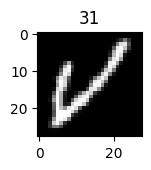

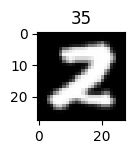

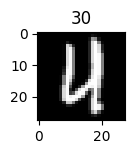

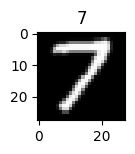

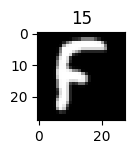

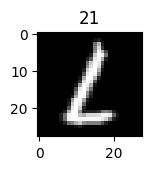

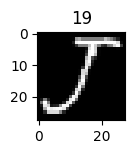

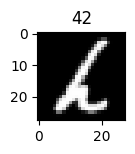

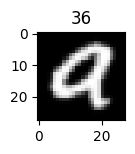

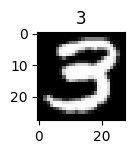

In [23]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/balanced',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
def preprocess(image, label):
    image = tf.transpose(image)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, (28, 28, 1))
    label = tf.one_hot(label, depth=47)
    return image, label
ds_train = ds_train.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(128).prefetch(tf.data.AUTOTUNE)
for images, labels in ds_train.take(1):
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
#print the images

import matplotlib.pyplot as plt

for image,label in ds_train.take(1):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().squeeze(),cmap='gray')
        plt.title(np.argmax(label[i],axis=0))
        plt.tight_layout()
        plt.show()


In [24]:
hybrid_model.fit(ds_train,epochs=15,batch_size=64,validation_data=ds_test)

Epoch 1/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.3631 - loss: 2.2296 - val_accuracy: 0.8240 - val_loss: 0.5176
Epoch 2/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8306 - loss: 0.5055 - val_accuracy: 0.8521 - val_loss: 0.4342
Epoch 3/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8618 - loss: 0.3983 - val_accuracy: 0.8661 - val_loss: 0.3858
Epoch 4/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8764 - loss: 0.3520 - val_accuracy: 0.8706 - val_loss: 0.3629
Epoch 5/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8821 - loss: 0.3273 - val_accuracy: 0.8752 - val_loss: 0.3554
Epoch 6/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8885 - loss: 0.3055 - val_accuracy: 0.8780 - val_loss: 0.3511
Epoch 7/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8928 - loss: 0.2897 - val_accuracy: 0.8780 - val_loss: 0.3537
Epoch 8/15
882/882 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.8964 - loss: 0.2741 - 

In [25]:
hybrid_model.evaluate(ds_test)

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8846 - loss: 0.3779


[0.3872174322605133, 0.8824999928474426]